# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

Paso 1: Instalación de dependencias

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import io

Paso 2: Descargar HTML

In [2]:
url = 'https://juegosdelamesaredonda.com/'
response = requests.get(url)
response.status_code


200

In [3]:
response.content

b' \n\n<!doctype html>\n<html lang="es-ES"  class="default" >\n\n  <head>\n    \n      \n  <meta charset="utf-8">\n\n\n  <meta http-equiv="x-ua-compatible" content="ie=edge">\n\n\n\n  <title>Comprar Juegos de mesa, juegos de cartas, juegos de rol, juegos de importaci\xc3\xb3n y juegos para ni\xc3\xb1os</title>\n  \n      \n    <script id=\'lgcookieslaw_script_gtm\'>\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){\n            dataLayer.push(arguments);\n        }\n\n        gtag(\'consent\', \'default\', {\n            \'ad_storage\': \'denied\',\n            \'ad_user_data\': \'denied\',\n            \'ad_personalization\': \'denied\',\n            \'analytics_storage\': \'denied\',\n            \'personalization_storage\': \'granted\',\n            \'security_storage\': \'granted\'\n        });\n    </script>\n\n  \n    <script id=\'lgcookieslaw_script_ms\'>\n        window.uetq = window.uetq || [];\n\n        window.uetq.push(\'consent\', \'default\', {

Paso 3: Transforma el HTML

In [4]:
soup = BeautifulSoup(response.content)
soup



<!DOCTYPE html>

<html class="default" lang="es-ES">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<title>Comprar Juegos de mesa, juegos de cartas, juegos de rol, juegos de importación y juegos para niños</title>
<script id="lgcookieslaw_script_gtm">
        window.dataLayer = window.dataLayer || [];
        function gtag(){
            dataLayer.push(arguments);
        }

        gtag('consent', 'default', {
            'ad_storage': 'denied',
            'ad_user_data': 'denied',
            'ad_personalization': 'denied',
            'analytics_storage': 'denied',
            'personalization_storage': 'granted',
            'security_storage': 'granted'
        });
    </script>
<script id="lgcookieslaw_script_ms">
        window.uetq = window.uetq || [];

        window.uetq.push('consent', 'default', {
            'ad_storage': 'denied',
        });
    </script>
<meta content="Juegos de la Mesa Redonda. Tienda on-line especializada donde

In [5]:
products = soup.find_all('div', class_='product-meta')
len(products)

41

In [6]:
price_tag = soup.find_all('span', class_='price')
price_tag[0]

<span aria-label="Precio" class="price">
                          58,61 €
              </span>

In [7]:
productsp = soup.find_all('div', class_= 'product-price-and-shipping')
productsp[0]


<div class="product-price-and-shipping">
<span aria-label="Precio regular" class="regular-price">68,95 €</span>
<span class="discount-percentage discount-product">-15%</span>
<span aria-label="Precio" class="price">
                          58,61 €
              </span>
</div>

Paso 4: Procesa el DataFrame

In [8]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 
list_products = []
for product in products:
    product_name = product.find_all('h3', class_='h3 product-title')
    price = product.find_all('span', class_='price')
    price_line = price[0].text
    price_clean =  re.findall(r'\d+[.,]?\d*', price_line)
    
    list_products.append({'name': product_name[0].text,
                          'price': price_clean[0]})
list_products 

[{'name': 'Stalingrad Roads (castellano)', 'price': '58,61'},
 {'name': 'Res Publica', 'price': '16,11'},
 {'name': 'Cartografos: Hornhelm (castellano)', 'price': '8,95'},
 {'name': 'Etherstone (castellano)', 'price': '31,46'},
 {'name': 'Kingdom Legacy: Reino Feudal - Fundamentos', 'price': '13,46'},
 {'name': 'Covenant (castellano)', 'price': '53,96'},
 {'name': 'The Witcher: La Senda del Destino - Pack Deluxe + PROMO',
  'price': '206,96'},
 {'name': 'El Señor de los Anillos (5E): Moria. La Sombra de Khazad Dum',
  'price': '37,95'},
 {'name': 'Ker Nethalas: El Trono de la Medianoche', 'price': '31,54'},
 {'name': 'Mutant year zero', 'price': '40,57'},
 {'name': 'Pequeños Grandes Reinos', 'price': '23,96'},
 {'name': 'Star Wars: Imperial Assault', 'price': '98,96'},
 {'name': 'Cthulhu: Death May Die (castellano)', 'price': '98,96'},
 {'name': 'La llamada de Cthulhu: Caja de inicio - Edicion Revisada',
  'price': '35,63'},
 {'name': 'Set a Watch: Edicion Deluxe (castellano)', 'price'

In [9]:
df = pd.DataFrame(list_products)
df

,name,price
0,Stalingrad Roads (castellano),"58,61"
1,Res Publica,"16,11"
2,Cartografos: Hornhelm (castellano),"8,95"
3,Etherstone (castellano),"31,46"
4,Kingdom Legacy: Reino Feudal - Fundamentos,"13,46"
5,Covenant (castellano),"53,96"
6,The Witcher: La Senda del Destino - Pack Delux...,"206,96"
7,El Señor de los Anillos (5E): Moria. La Sombra...,"37,95"
8,Ker Nethalas: El Trono de la Medianoche,"31,54"
9,Mutant year zero,"40,57"


Paso 5: Almacena los datos en sqlite

In [10]:
conn = sqlite3.connect('Juegos de Mesa')

In [11]:
df.to_sql("most_played", conn, if_exists="replace", index=False)
cursor = conn.cursor()
cursor

In [12]:
cursor.execute("SELECT COUNT(*) FROM most_played")
print("Rows inserted:", cursor.fetchone()[0])

conn.commit()
conn.close()

Rows inserted: 41


Paso 6: Visualiza los datos

In [13]:
df['price_float'] = df['price'].str.replace(',', '.')
df

,name,price,price_float
0,Stalingrad Roads (castellano),"58,61",58.61
1,Res Publica,"16,11",16.11
2,Cartografos: Hornhelm (castellano),"8,95",8.95
3,Etherstone (castellano),"31,46",31.46
4,Kingdom Legacy: Reino Feudal - Fundamentos,"13,46",13.46
5,Covenant (castellano),"53,96",53.96
6,The Witcher: La Senda del Destino - Pack Delux...,"206,96",206.96
7,El Señor de los Anillos (5E): Moria. La Sombra...,"37,95",37.95
8,Ker Nethalas: El Trono de la Medianoche,"31,54",31.54
9,Mutant year zero,"40,57",40.57


In [14]:
def wrap_labels_while(text, width=3):
    words = text.split(' ')
    wrapped_lines = []
    i = 0
    while i < len(words):
        palabra = words[i : i + width]
        wrapped_lines.append(' '.join(palabra))
        i += width 
    return '\n'.join(wrapped_lines)
df['wrapped_lines'] = df['name'].apply(wrap_labels_while)
df['wrapped_lines']

0                         Stalingrad Roads (castellano)
1                                           Res Publica
2                    Cartografos: Hornhelm (castellano)
3                               Etherstone (castellano)
4           Kingdom Legacy: Reino\nFeudal - Fundamentos
5                                 Covenant (castellano)
6     The Witcher: La\nSenda del Destino\n- Pack Del...
7     El Señor de\nlos Anillos (5E):\nMoria. La Somb...
8             Ker Nethalas: El\nTrono de la\nMedianoche
9                                      Mutant year zero
10                              Pequeños Grandes Reinos
11                         Star Wars: Imperial\nAssault
12                 Cthulhu: Death May\nDie (castellano)
13    La llamada de\nCthulhu: Caja de\ninicio - Edic...
14            Set a Watch:\nEdicion Deluxe (castellano)
15    Star Wars El\nBorde Exterior: Asuntos\nPendientes
16      Dead by Daylight:\nthe board game\n(castellano)
17    Mythwind: Mini Expansion\nWinds of Magic\n

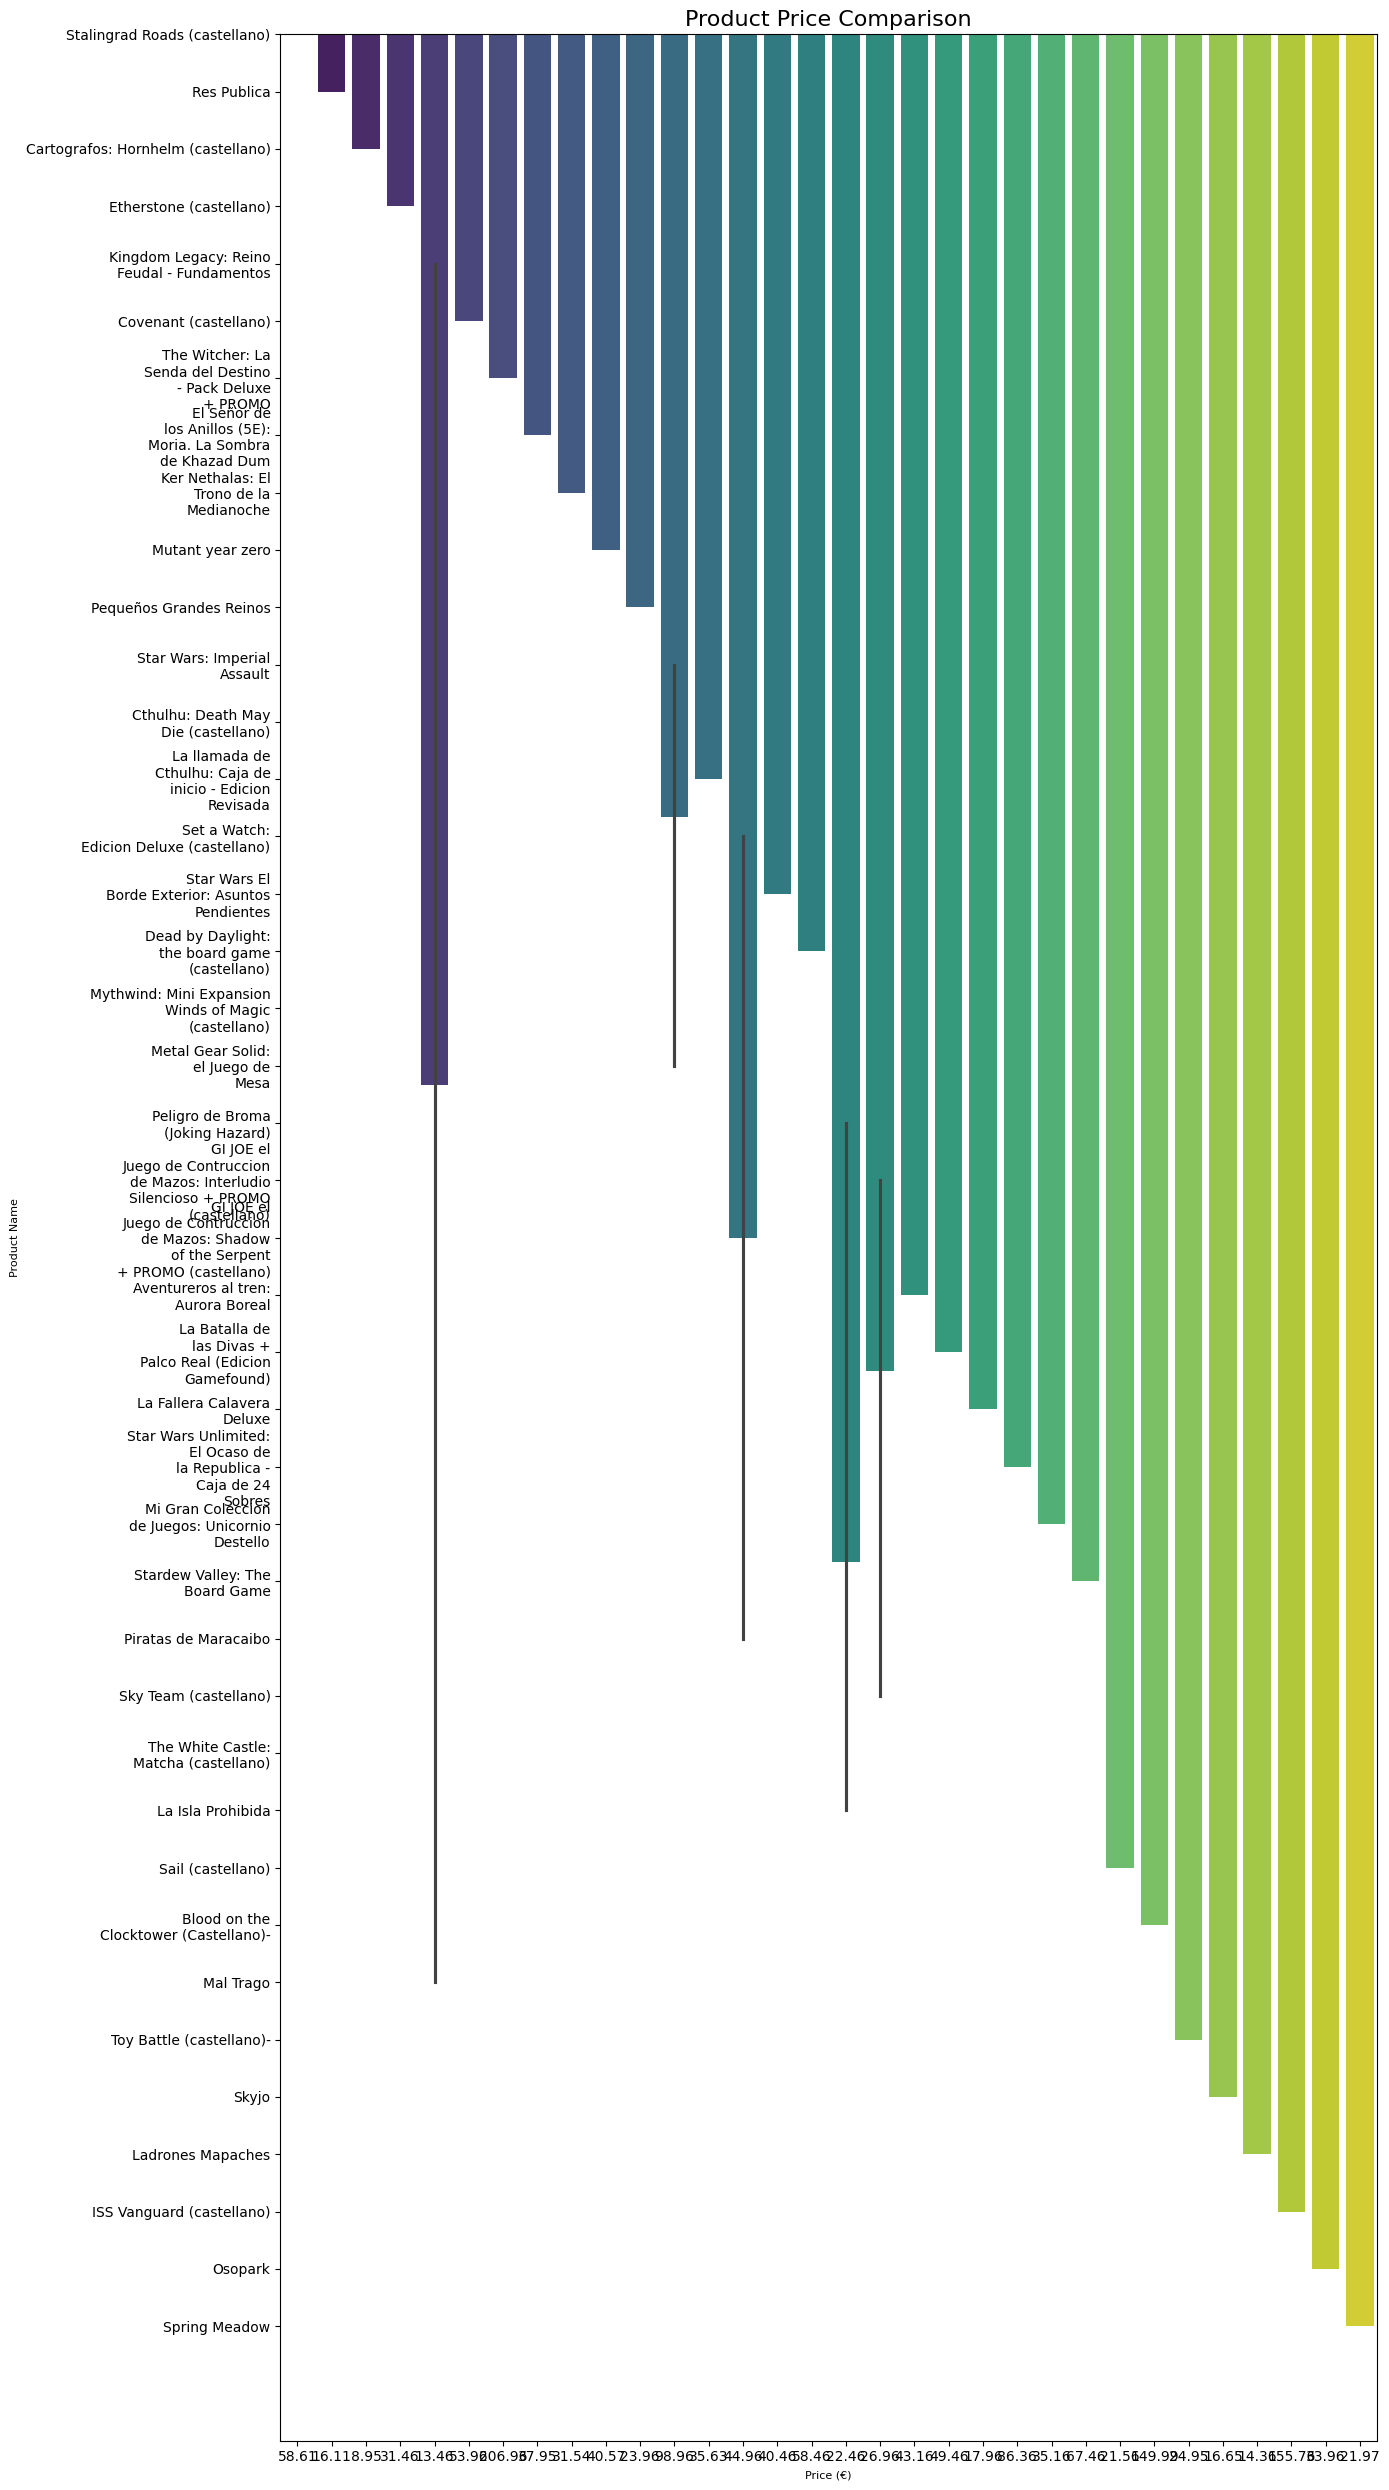

In [15]:
df_sorted = df.sort_values(by='price_float', ascending=False)
plt.figure(figsize=(14, 25))
sns.barplot(x=df['price_float'],
            y=df['wrapped_lines'],
            hue='price_float', legend=False,
            data=df_sorted,
            palette="viridis")


plt.title('Product Price Comparison', fontsize=16)
plt.xlabel('Price (€)', fontsize=8)
plt.ylabel('Product Name', fontsize=8)
plt.tight_layout() 
plt.show()